# Aula 03 - Parte 02

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

# Exercício 1
**Objetivo: visualizar uma núvem de pontos e calcular a área de núvens de pontos**

Neste exercício e nos próximos, vamos usar visualizações com núvens de pontos. Inicialmente, vamos entender bem como usar esse recurso de visualização.

1. Na figura abaixo, encontre a área ocupada pela nuvem de pontos.
2. Modifique os parâmetros da chamada `np.random.uniform(-0.5, 0.5, size=(2, 600))` para que a núvem de pontos ocupe uma área 4 vezes maior que a que você calculou inicialmente. A solução para isso é única?

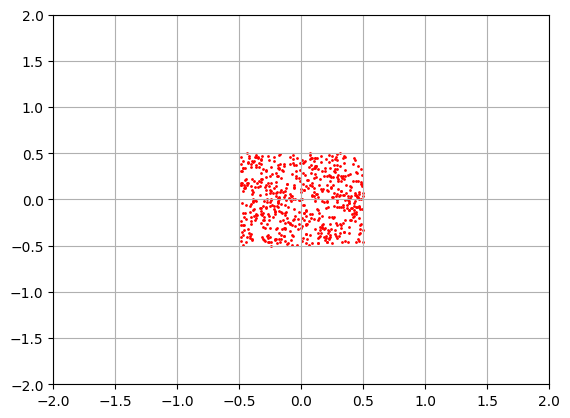

In [2]:
x = np.random.uniform(-0.5, 0.5, size=(2, 600))
plt.figure()
plt.scatter(x[0,:], x[1,:], s=1, c='r')
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.grid()
plt.show()

# Exercício 2
**Objetivo: identificar diferentes tipos de transformadas**

Quando multiplicamos a núvem de pontos por uma matriz $A$, levamos a uma transformação de seu formato:

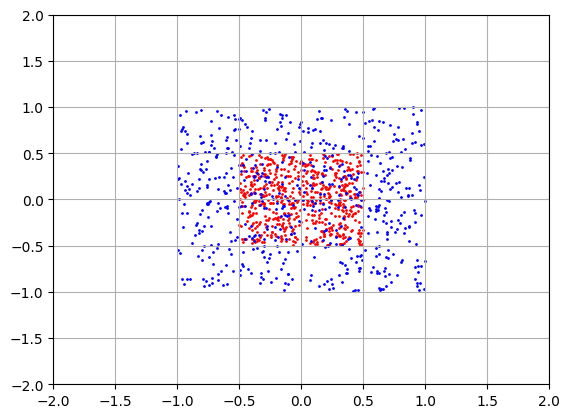

In [3]:
x = np.random.uniform(-0.5, 0.5, size=(2, 600))
A = np.array([ [2, 0], [0, 2] ])
y = A @ x
plt.figure()
plt.scatter(x[0,:], x[1,:], s=1, c='r')
plt.scatter(y[0,:], y[1,:], s=1, c='b')
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.grid()
plt.show()

Existem algumas transformações que são conhecidas por seus nomes:

* Rotação
* Cisalhamento
* Expansão ou contração (no eixo X e/ou no eixo Y)

1. Usando o código acima como base, identifique as matrizes, dentre as abaixo, que correspondem a rotações, cisalhamentos, expansões ou contrações:
$$
\begin{bmatrix}
    1 & 0\\
    0 & 2
\end{bmatrix}
\begin{bmatrix}
    1 & 1\\
    0 & 1
\end{bmatrix}
\begin{bmatrix}
    1 & 0\\
    1 & 1
\end{bmatrix}
\begin{bmatrix}
    0.7 & -0.7\\
    0.7 & 0.7
\end{bmatrix}
\begin{bmatrix}
    0.86 & -0.5\\
    0.5 & 0.86
\end{bmatrix}
$$

2. Para cada matriz, encontre uma outra matriz que retorna os pontos transformados à sua posição original (isto é, a transformação inversa).

# Exercício 3
**Objetivo: relacionar transformações geométricas com o determinante das matrizes**

1. Transforme a núvem de pontos anterior com a matriz $A$ abaixo. Use os seguintes valores para $D$: 1, 1.5, 2, 0. Para cada valor de $D$ na matriz, calcule o determinante da matriz e a área da núvem de pontos resultante.
$$
A = 
\begin{bmatrix}
    1 & 0\\
    0 & D
\end{bmatrix}
$$

2. Reflita: o que significa o determinante em relação à transformação da área da núvem de pontos?
3. Reflita: por que o determinante $0$ implica necessariamente em uma matriz não ser inversível?

# Exercício 4
**Objetivo: aplicar transformadas compostas**

Podemos aplicar transformadas em sequência. Por exemplo, a figura abaixo pode ser obtida primeiro aplicando uma contração/expansão nos eixos $x$ e $y$, e depois disso uma rotação:

<img src="transformada_composta.png" width=300>

1. Reproduza a imagem acima usando nossa núvem de pontos. Se precisar, use as matrizes de rotação que estão nos exercícios anteriores.
2. Encontre uma matriz que realiza, simultaneamente, as duas transformações acima. Como é o procedimento para encontrá-la?
3. Seria possível termos matrizes que realizam 3 ou mais etapas de transformações simultaneamente?

In [ ]:
# Faça seu código aqui

# Exercício 5
**Objetivo: aplicar uma translação em pontos**

A operação de translação consiste em mover pontos somando algum valor neles. Por exemplo, podemos fazer uma translação somando um vetor a outro, isto é:

$$
y = x + \Delta x
$$

In [ ]:
x = np.random.uniform(-0.5, 0.5, size=(2, 600))
delta_x = np.array([ [1], [1] ])
y = x + delta_x
plt.figure()
plt.scatter(x[0,:], x[1,:], s=1, c='r')
plt.scatter(y[0,:], y[1,:], s=1, c='b')
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.grid()
plt.show()

1. Altere o código abaixo para encontrar uma compressão no eixo X seguida de uma rotação, seguida por fim de uma translação. Use, para isso, as matrizes $A$ e $B$ que já estão definidas no código. Crie novas matrizes se precisar. O resultado deve ser parecido com:
<img src="translacao_com_rotacao.png" width=300>

2. Com essa formulação, é possível criar uma única matriz que realiza essas três transformações simultaneamente?

In [ ]:
# Comece com esse código inicial!
x = np.random.uniform(-0.5, 0.5, size=(2, 600))
A = np.array( [[0.5, 0], [0, 1]]) # Compressao
B = np.array( [[0.7, -0.7], [0.7, 0.7]]) # Rotacao

# Altere daqui para baixo
# -----------------
y = x
# -----------------
# Altere daqui para cima

plt.figure()
plt.scatter(x[0,:], x[1,:], s=1, c='r')
plt.scatter(y[0,:], y[1,:], s=1, c='b')
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.grid()
plt.show()

# Exercício 6
**Objetivo: aplicar uma translação usando multiplicação matricial**

Antes de prosseguir com essa exposição, vamos refletir sobre o que significa uma multiplicação matricial. Neste exemplo:

$$
\begin{bmatrix}
    a & b\\
    c & d
\end{bmatrix}
\begin{bmatrix}
    x \\
    y
\end{bmatrix}
=
\begin{bmatrix}
    p \\
    q
\end{bmatrix}
$$

devemos lembrar que as componentes $p$ e $q$ são calculadas por:

$$
\begin{cases}
\begin{aligned}
  p &= ax + by\\
  q &= cx + dy
\end{aligned}
\end{cases}
$$

Como já vimos, essa operação funciona para a rotação, expansão/compressão e cisalhamento.

Porém, se fizermos uma rotação seguida de uma translação, a operação que fazemos é:
$$
\begin{bmatrix}
    a & b\\
    c & d
\end{bmatrix}
\begin{bmatrix}
    x \\
    y
\end{bmatrix}
+
\begin{bmatrix}
    \Delta x \\
    \Delta y
\end{bmatrix}
=
\begin{bmatrix}
    p \\
    q
\end{bmatrix}
$$

e isso pode ser escrito na forma de um sistema como:
$$
\begin{cases}
\begin{aligned}
  p &= ax + by + \Delta x\\
  q &= cx + dy + \Delta y
\end{aligned}
\end{cases}
$$

Vamos usar a seguinte ideia: adicionaremos uma dimensão ao nosso vetor de posição. Essa nova dimensão sempre tem valor 1. Essa dimensão só serve para conseguirmos "encaixar" a translação no mesmo esquema matemático, e não é representada quando plotamos nossos vetores. Daí, podemos re-escrever esse sistema como:

$$
\begin{bmatrix}
    a & b & \Delta x\\
    c & d & \Delta y \\
    0 & 0 & 1 \\
\end{bmatrix}
\begin{bmatrix}
    x \\
    y \\
    1
\end{bmatrix}
=
\begin{bmatrix}
    p \\
    q \\
    1
\end{bmatrix}
$$

A *vantagem* dessa abordagem é que agora podemos incorporar translações entre as nossas transformações implementadas por multiplicação matricial. A *desvantagem* é que agora nossas matrizes de transformação, que eram $2 \times 2$, passam a ser $3 \times 3$ e devem ser completadas da seguinte forma:

$$
\begin{bmatrix}
    a & b \\
    c & d  \\
\end{bmatrix}
\Rightarrow
\begin{bmatrix}
    a & b & 0\\
    c & d & 0 \\
    0 & 0 & 1 \\
\end{bmatrix}
$$

Com base nisso, analisando o código abaixo:

1. A nuvem de pontos é criada com uma instrução diferente. Qual é essa diferença e por que ela acontece?
2. Analise as transformações: $Ax$ e $Bx$. Qual matriz ($A$ ou $B$) é uma matriz de translação e qual é uma matriz de rotação?
3. Analise as transformações: $ABx$ e $BAx$. Elas levam a resultados iguais? Justifique as diferenças!

In [ ]:
import numpy as np

T1 = np.array([[1, 0, -4], [0, 1, -5], [0, 0, 1]])
T2 = np.array([[1, 0, 4], [0, 1, 5], [0, 0, 1]])
ang = np.pi/6
R = np.array([[np.cos(ang), -np.sin(ang), 0], [np.sin(ang), np.cos(ang), 0], [0, 0, 1]])
A = T2 @ R @ T1
print(A)

In [ ]:
# Comece com esse código inicial!
x = np.vstack( (np.random.uniform(-0.5, 0.5, size=(2, 600)), np.ones( (1,600) )))
A = np.array( [[1, 0, 1], [0, 1, 1], [0, 0, 1]])
B = np.array( [[0.7, -0.7, 0], [0.7, 0.7, 0], [0, 0, 1]])

# Altere daqui para baixo
# -----------------
y =  A @ x
# -----------------
# Altere daqui para cima

plt.figure()
plt.scatter(x[0,:], x[1,:], s=1, c='r')
plt.scatter(y[0,:], y[1,:], s=1, c='b')
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.grid()
plt.show()

# Exercício 7
**Objetivo: usar transformações compostas**

Encontre uma matriz única que realiza uma rotação, uma translação, um cisalhamento e uma expansão e/ou contração, na ordem que você escolher e com os parâmetros que preferir. Para isso, encontre uma matriz para a rotação, outra para a translação, outra para o cisalhamento e outra para a contração, e combine-as usando uma multiplicação. Demonstre sua transformação final usando uma núvem de pontos.